## 연습문제 1

다음 4건의 데이터에 대해 Merkle Root 값을 계산하고 출력하세요.

중간 노드의 AB, CD의 해시도 출력하세요.

* txA = 'Hello'

* txB = 'How are you?'

* txC = 'This is Thursday'

* txD = 'Happy new Year'

In [1]:
import hashlib

nonce=1
txA = 'Hello'.encode()
txB = 'How are you?'.encode()
txC = 'This is Thursday'.encode()
txD = 'Happy new Year'.encode()

#### Hashing

In [2]:
hashA=hashlib.sha256(txA)
hashB=hashlib.sha256(txB)
hashC=hashlib.sha256(txC)
hashD=hashlib.sha256(txD)

In [3]:
hashA.hexdigest()

'185f8db32271fe25f561a6fc938b2e264306ec304eda518007d1764826381969'

In [4]:
hashB.hexdigest()

'df287dfc1406ed2b692e1c2c783bb5cec97eac53151ee1d9810397aa0afa0d89'

In [5]:
hashB.hexdigest()

'df287dfc1406ed2b692e1c2c783bb5cec97eac53151ee1d9810397aa0afa0d89'

In [6]:
hashD.hexdigest()

'127b4bccb4a3122b7112140a8257e38677a959b8f9355dc3cd3b8d1fc078852f'

#### Byteswap

In [7]:
hashAswap="".join(reversed([hashA.hexdigest()[i:i+2] for i in range(0, hashA.digest_size*2, 2)]))

In [8]:
hashBswap="".join(reversed([hashB.hexdigest()[i:i+2] for i in range(0, hashB.digest_size*2, 2)]))

In [9]:
hashCswap="".join(reversed([hashC.hexdigest()[i:i+2] for i in range(0, hashC.digest_size*2, 2)]))

In [10]:
hashDswap="".join(reversed([hashD.hexdigest()[i:i+2] for i in range(0, hashD.digest_size*2, 2)]))

In [11]:
print("hashAswap: ", hashAswap, "\nhashBswap: ",hashBswap)
print("hashCswap: ", hashCswap, "\nhashDswap: ",hashDswap)

hashAswap:  691938264876d1078051da4e30ec0643262e8b93fca661f525fe7122b38d5f18 
hashBswap:  890dfa0aaa970381d9e11e1553ac7ec9ceb53b782c1c2e692bed0614fc7d28df
hashCswap:  3b06b3cc1ce7ee295589c7d97e132a616efff32c9a63e4738fd3b835a7991e0d 
hashDswap:  2f8578c01f8d3bcdc35d35f9b859a97786e357820a1412712b12a3b4cc4b7b12


#### Double hashing AB, CD

In [12]:
hashAB=hashAswap+hashBswap
hashCD=hashCswap+hashDswap

In [19]:
doubleHashAB=hashlib.sha256(hashAB.encode()).hexdigest()
print("double hash AB: ",doubleHashAB)
doubleHashCD=hashlib.sha256(hashCD.encode()).hexdigest()
print("\ndouble hash CD: ",doubleHashCD)

double hash AB:  a7dca36b1e6fe56e1d7bc34fe56ceea8ab64f47a55e929b712fab58885dcdc37

double hash CD:  15524f5c1b536c2fe0f717fd8b1bbede37f94654fae6f47c20521ce476c8e0b2


#### Merkle root (Double hashing ABCD)

In [14]:
hashABCD=doubleHashAB+doubleHashCD

In [15]:
doubleHashABCD=hashlib.sha256(hashABCD.encode()).hexdigest()
print("double hash ABCD: ",doubleHashABCD)

double hash ABCD:  ebf28da68da599ed4060088d1821a9906ec29ff6381f94e211797d4c4b6657b8


## 연습문제 2

친구에게  주소를 구하고, 그 주소로 송금해 보자. 송금이 되지 않으면 왜 안되는지 이유를 알아보자.

안되면 친구의 주소를 만들고 전송한다.

잔고의 증가분을 출력하세요.

소요된 gas비용 출력하세요.



#### solution

친구에게 송금이 되지 않는다. 이유는 거래를 발행해도, 블록체인의 블록 안에 거래 포함시지 않으면 거래의 내용이 실행되지 않는다. 즉, 블록이 생성될 때 Transaction이 블록에 포함되도록 채굴을 먼저 진행해야 한다.

잔고의 증가분은 다음과 같고. 소요된 gas비용은 21000이다.

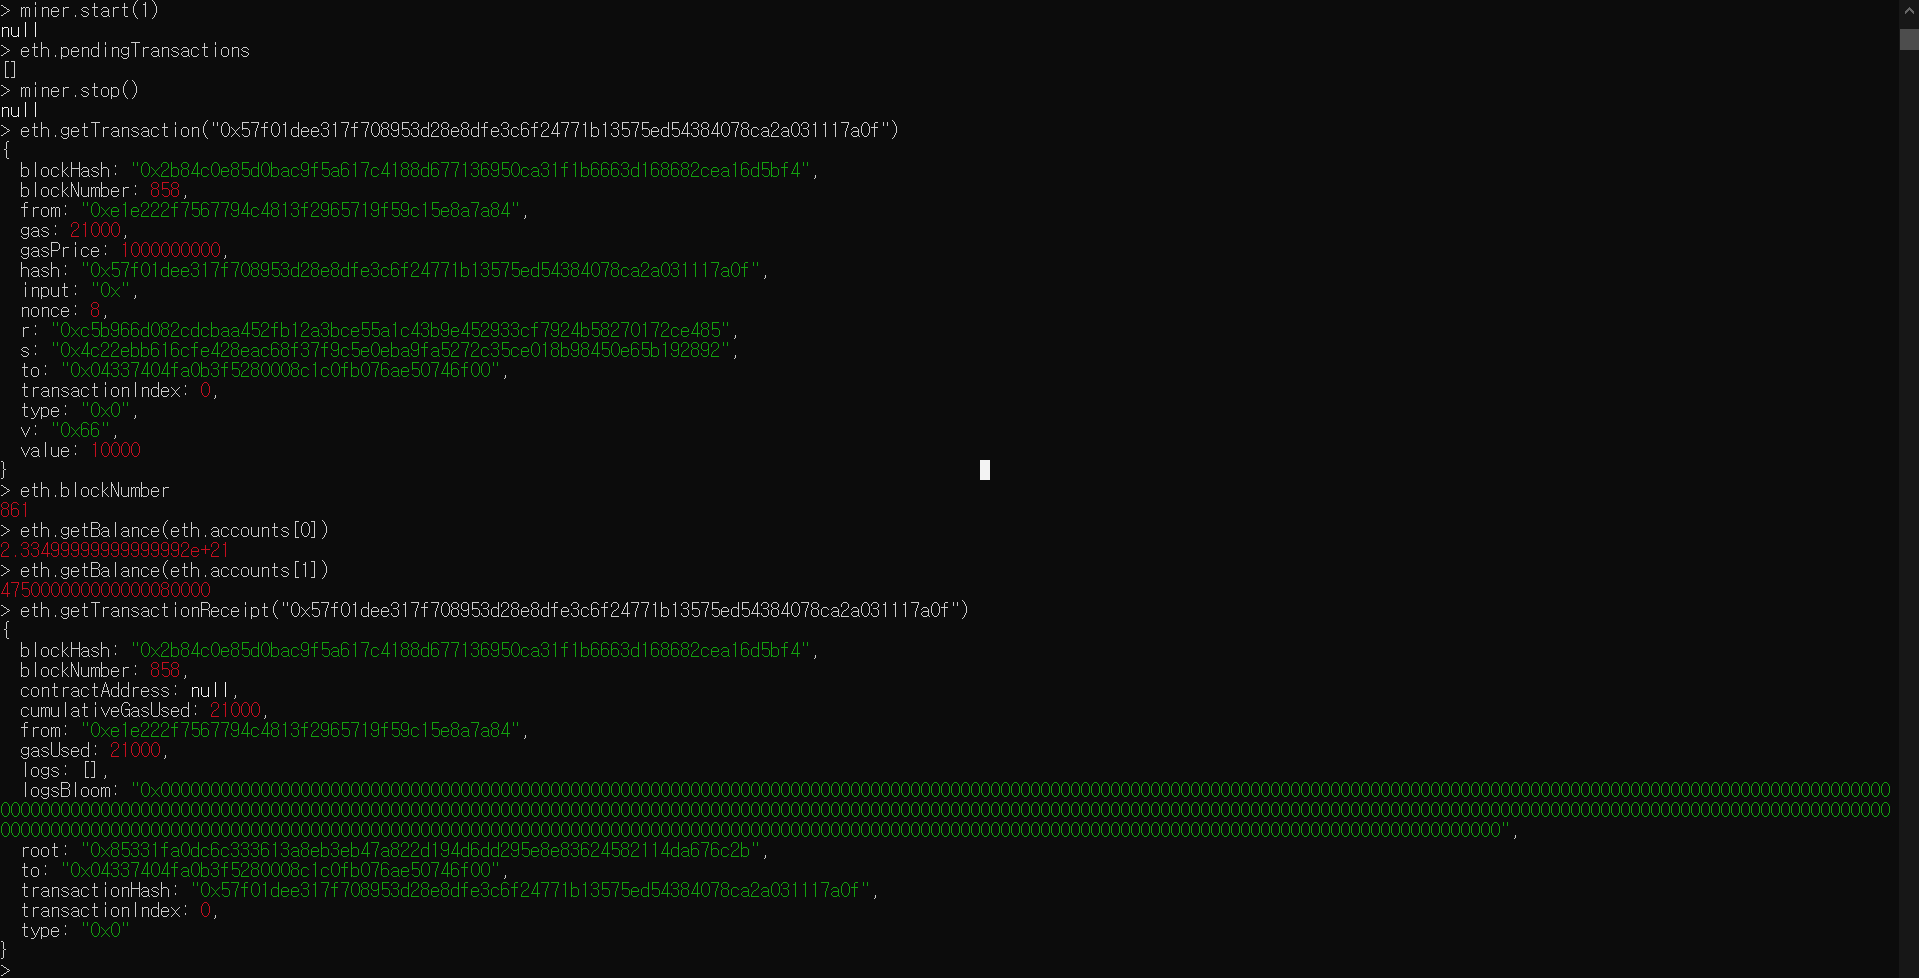

In [16]:
from IPython.display import Image
Image("gasUsed.PNG")

## 연습문제 3

해시는 100미만의 양수로 정해진다고 하자.

NONCE는 반복회수로만 쓰이고 무작위 수를 생성하는데 입력되지는 않는다.

목표해시는 난이도에 따라 결정이 된다고 하자.

마이닝을 해서, 목표 해시를 찾아보자.

- 90을 목표해시로 정하고 몇 회만에 마이닝에 성공하는지 출력

- 10을 목표해시로 정하고 몇 회만에 마이닝에 성공하는지 출력

#### 목표해시 = 90

In [17]:
from random import randint
import random

for i in range(1,20):
    num = int(random.random()*100)
    print(num, end=" ")
    if num < 90:
        break

7 

#### 목표해시 = 10

In [18]:
from random import randint
import random

for i in range(1,20):
    num = int(random.random()*100)
    print(num, end=" ")
    if num < 10:
        break

11 16 21 86 97 29 60 73 44 42 33 9 

목표해시 90으로 설정 시, 1회만에 마이닝 성공

목표해시 10으로 설정 시, 5회만에 마이닝 성공